<a href="https://colab.research.google.com/github/Harsshhhh/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
telecom = pd.read_csv("Telecom Churn.csv")

In [ ]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telecom.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
non_churn_count = telecom["Churn"][telecom["Churn"]== False].count()
non_churn_count

2850

In [ ]:
churn_count = telecom["Churn"][telecom["Churn"]== True].count()
churn_count

483

###### CHURN %

In [ ]:
Count_by_churn= telecom.groupby("Churn").size()
Count_by_churn

Churn
False    2850
True      483
dtype: int64

Text(0, 1.3, '% CHURN')

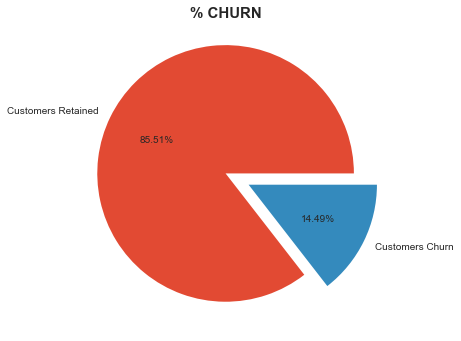

In [ ]:
plt.pie(Count_by_churn,labels= ['Customers Retained', 'Customers Churn'],autopct='%.2f%%',explode = [0,0.2])
plt.text(x=0,y=1.3,s="% CHURN", fontweight='bold',fontsize=15,horizontalalignment='center',verticalalignment='top')

###### DOES CUSTOMER CHURN DEPENDS UPON USING VOICE MAIL FEATURE? 

In [ ]:
vmail_users = telecom.loc[~(telecom["Number vmail messages"]==0)]

In [ ]:
vmail_users.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
16,ID,85,408,No,Yes,27,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,13.8,4,3.73,1,False


<AxesSubplot:title={'center':'Number vmail messages'}, xlabel='Churn'>

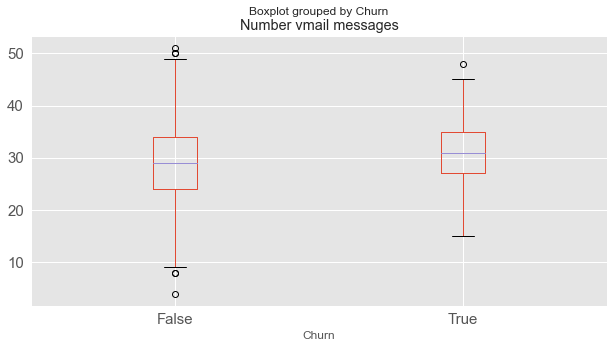

In [ ]:
vmail_users.boxplot(column='Number vmail messages', by='Churn',figsize=(10,5),fontsize=15)

In [ ]:
vmail_users.groupby(by="Churn")["Number vmail messages"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,842.0,29.124703,7.576789,4.0,24.0,29.0,34.0,51.0
True,80.0,30.887500,7.219863,15.0,27.0,31.0,35.0,48.0


###### Is there any difference between Total day usage in Churned & Non-churned customers

In [ ]:
telecom.groupby("Churn")["Total day calls"].describe()  # No diff in no of calls made by churn and non churn

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,100.283158,19.801157,0.0,87.0,100.0,114.0,163.0
True,483.0,101.335404,21.582307,0.0,87.5,103.0,116.5,165.0


In [ ]:
telecom.groupby("Churn")["Total day minutes"].describe() #but diff in minutes , this proves problem in long calls in day

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,175.175754,50.181655,0.0,142.825,177.2,210.30,315.6
True,483.0,206.914079,68.997792,0.0,153.250,217.6,265.95,350.8


In [ ]:
#Splitting the data by churn and non-churn customers

Churn = telecom[telecom["Churn"]==True] 
Non_churn = telecom[telecom["Churn"]==False]

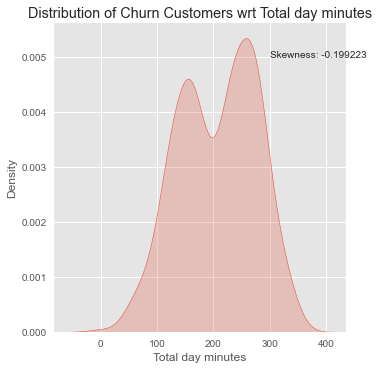

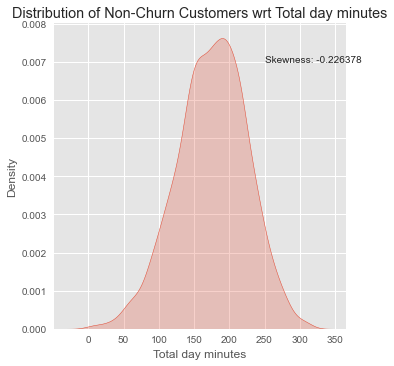

In [ ]:
#plotting distribution plot to compare day usage between churned and non-churn customers

sns.displot(Churn["Total day minutes"],kind='kde',fill=True)
plt.title("Distribution of Churn Customers wrt Total day minutes")
plt.text(x=300,y=0.005,s="Skewness: %f " % Churn["Total day minutes"].skew())
sns.displot(Non_churn["Total day minutes"],kind='kde',fill=True)
plt.title("Distribution of Non-Churn Customers wrt Total day minutes")
plt.text(x=250,y=0.007,s="Skewness: %f " % Non_churn["Total day minutes"].skew())
plt.show()

<AxesSubplot:title={'center':'Total day minutes'}, xlabel='Churn'>

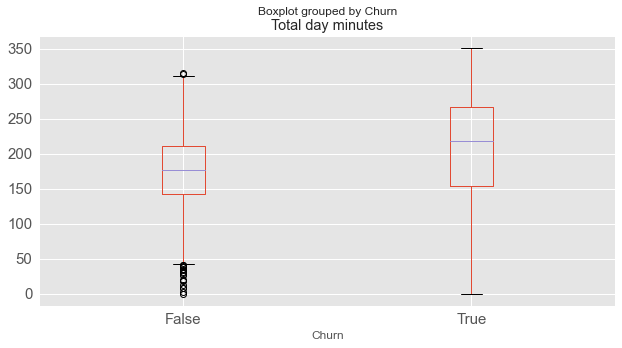

In [ ]:
telecom.boxplot(column='Total day minutes', by='Churn',figsize=(10,5),fontsize=15)

In [ ]:
telecom.groupby("Churn")["Total eve calls"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,100.038596,19.958414,0.0,87.0,100.0,114.0,170.0
True,483.0,100.561077,19.724711,48.0,87.0,101.0,114.0,168.0


In [ ]:
telecom.groupby("Churn")["Total eve minutes"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,199.043298,50.292175,0.0,164.5,199.6,233.20,361.8
True,483.0,212.410145,51.728910,70.9,177.1,211.3,249.45,363.7


<AxesSubplot:title={'center':'Total eve minutes'}, xlabel='Churn'>

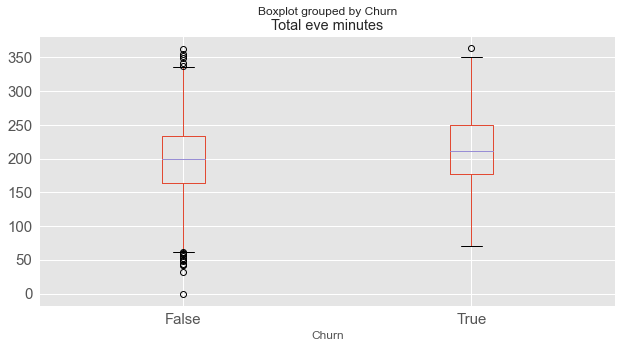

In [ ]:
telecom.boxplot(column='Total eve minutes', by='Churn',figsize=(10,5),fontsize=15)

In [ ]:
telecom.groupby("Churn")["Total night calls"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,100.058246,19.506246,33.0,87.0,100.0,113.0,175.0
True,483.0,100.399586,19.950659,49.0,85.0,100.0,115.0,158.0


In [ ]:
telecom.groupby("Churn")["Total night minutes"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,200.133193,51.105032,23.2,165.90,200.25,234.90,395.0
True,483.0,205.231677,47.132825,47.4,171.25,204.80,239.85,354.9


<AxesSubplot:title={'center':'Total night minutes'}, xlabel='Churn'>

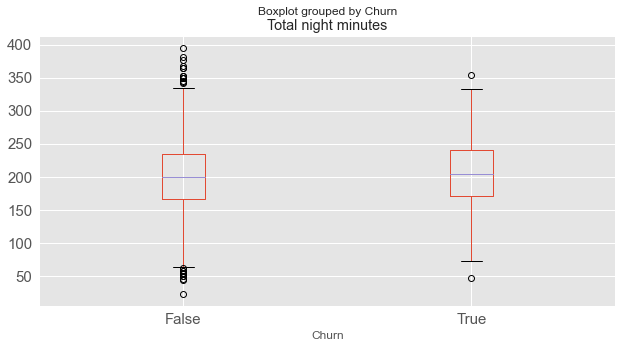

In [ ]:
telecom.boxplot(column='Total night minutes', by='Churn',figsize=(10,5),fontsize=15)

###### Analysisng user behaviour wrt International plan

In [ ]:
Intl_plan_users= telecom[telecom["International plan"]=='Yes']

In [ ]:
Intl_plan_users.groupby("Churn").size()

Churn
False    186
True     137
dtype: int64

Text(0, 1.3, '% CHURN of customers who uses international plan')

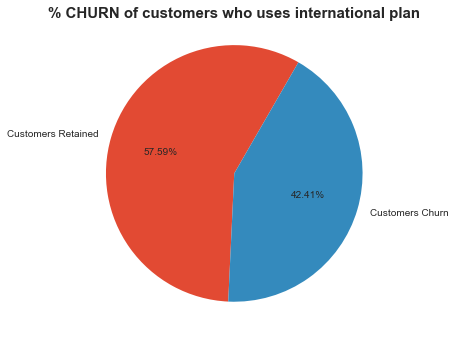

In [ ]:
 plt.pie(a,labels= ['Customers Retained', 'Customers Churn'],autopct='%.2f%%',startangle=60)
plt.text(x=0,y=1.3,s="% CHURN of customers who uses international plan", fontweight='bold',fontsize=15,horizontalalignment='center',verticalalignment='top')

In [ ]:
Intl_plan_users.groupby("Churn")["Total intl minutes"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,186.0,9.777957,2.183748,1.3,8.4,10.1,11.3,13.0
True,137.0,11.782482,2.900707,4.1,9.7,11.7,13.8,20.0


In [ ]:
Intl_plan_users.groupby("Churn")["Total intl calls"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,186.0,5.102151,2.248193,3.0,3.0,4.0,6.0,15.0
True,137.0,3.941606,2.952483,1.0,2.0,3.0,5.0,20.0


<AxesSubplot:title={'center':'Total intl minutes'}, xlabel='Churn'>

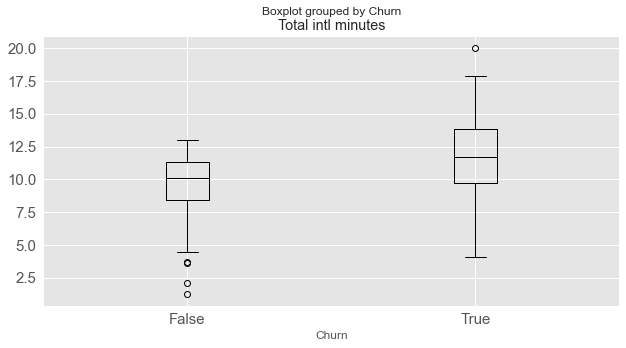

In [ ]:
Intl_plan_users.boxplot(column='Total intl minutes', by='Churn',figsize=(10,5),fontsize=15,color='black')

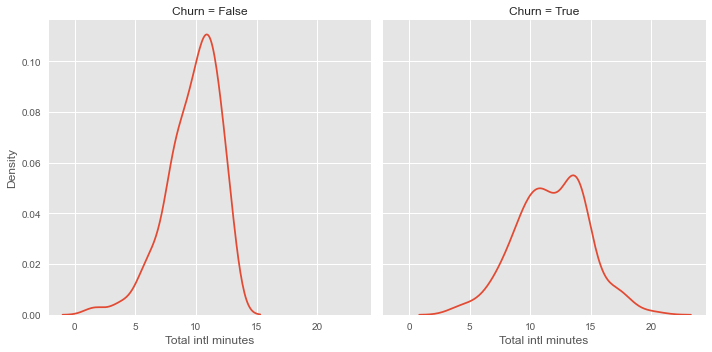

In [ ]:
sns.displot(data=Intl_plan_users,x="Total intl minutes",col="Churn",kind="kde")

In [ ]:
Intl_plan_users.groupby("Churn")["Total intl charge"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,186.0,2.640538,0.589324,0.35,2.27,2.73,3.05,3.51
True,137.0,3.181314,0.783110,1.11,2.62,3.16,3.73,5.40


###### AREA WISE ANALYSIS

In [ ]:
telecom["State"].unique()    #states

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
Statewise_churn_count=Churn.groupby("State").size()    #Statewise count of churned customers

In [ ]:
Statewise_totalcount=telecom.groupby("State").size()   #Statewise  total count of customers

In [ ]:
Statewise_churn_prcnt=Statewise_churn_count*100/Statewise_totalcount    # Statewise Churn %

In [ ]:
# Making DataFrame of statewise churn %

Churn_prcnt_statewise=pd.DataFrame(Statewise_churn_prcnt)

In [ ]:
Churn_prcnt_statewise.rename(columns={ 0 : "Prcnt_churn"},inplace=True)

In [ ]:
Churn_prcnt_statewise.sort_values("Prcnt_churn",inplace=True,ascending=False) 
Churn_prcnt_statewise10=Churn_prcnt_statewise.head(10)

Text(0, 0.5, '% Churn')

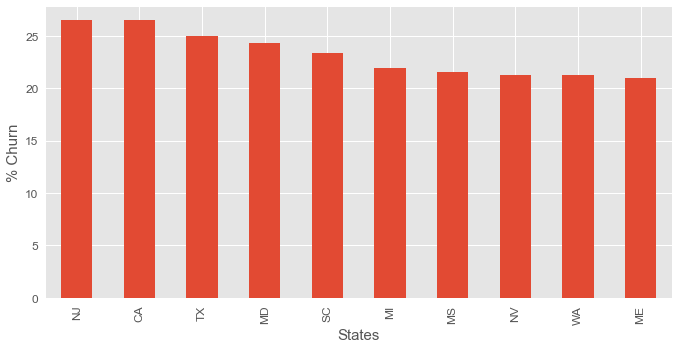

In [ ]:
# Bar plot to display Statewise churn % in descending order

Churn_prcnt_statewise10.plot(use_index=True,y='Prcnt_churn',kind='bar',figsize=(10,5),legend=False,fontsize=12)
plt.xlabel('States',fontsize=15)
plt.ylabel('% Churn',fontsize=15)


ANALYSIS BY CUSTOMER SERVICE 

In [ ]:
telecom.groupby(['Churn'])['Customer service calls'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
False,2850.0,1.449825,1.163883,0.0,1.0,1.0,2.0,8.0
True,483.0,2.229814,1.853275,0.0,1.0,2.0,4.0,9.0


In [ ]:
# MEAN OF CUSTOMER SERVICE CALLS STATEWISE

mean_cc_statewise = telecom.groupby(['State','Churn'])['Customer service calls'].mean()
mean_cc_statewise

State  Churn
AK     False    1.448980
       True     3.333333
AL     False    1.402778
       True     3.000000
AR     False    1.522727
                  ...   
WI     True     1.857143
WV     False    1.364583
       True     2.800000
WY     False    1.382353
       True     1.888889
Name: Customer service calls, Length: 102, dtype: float64

In [ ]:
mean_cc_statewise_df = pd.DataFrame(mean_cc_statewise) 

In [ ]:
mean_cc_statewise_df.reset_index(inplace=True)

Converting data in required format to plot

In [ ]:
# VALUES OF ONLY NON-CHURNED CUSTOMER

mean_false=mean_cc_statewise_df[mean_cc_statewise_df["Churn"]==False]

In [ ]:
# VALUES OF ONLY CHURNED CUSTOMER

mean_True=mean_cc_statewise_df[mean_cc_statewise_df["Churn"]==True]

In [ ]:
#MERGING CHURNED & NON-CHURNED MEAN OF CUSTOMER SERVICE CALLS STATEWISE

statewise_calls_mean = pd.merge(mean_false,mean_True,on='State',how='outer')
statewise_calls_mean.drop(['Churn_x','Churn_y'],inplace=True,axis=1)

In [ ]:
statewise_calls_mean.rename(columns={"Customer service calls_x":"Mean_False","Customer service calls_y":"Mean_True"},inplace=True)
statewise_calls_mean.sort_values("Mean_True",inplace=True,ascending=False) 

#ROUND TO 2 DECIMAL PLACES
statewise_calls_mean.Mean_False=statewise_calls_mean.Mean_False.round(2)    
statewise_calls_mean.Mean_True=statewise_calls_mean.Mean_True.round(2)

#Top10 states with max customer service calls made by churned customer
statewise_calls_mean10=statewise_calls_mean.head(10)    
statewise_calls_mean10

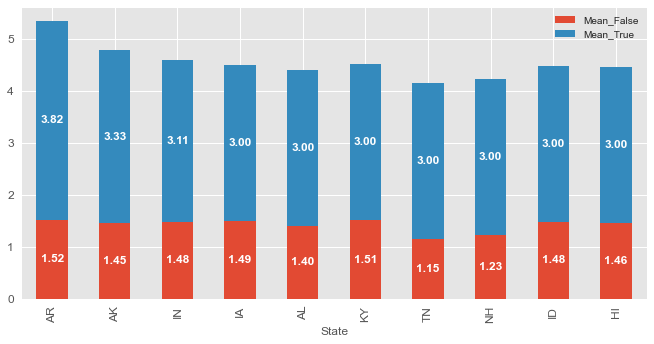

In [ ]:

ax=statewise_calls_mean10.plot.bar(x='State',stacked=True,figsize=(10,5),fontsize=12)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}' #to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12,color='white',fontweight='bold')